# Classification Problem
Next I will develop a Logistic Regression model to predict different classes. More specifically Logistic Regression is used to estimate the probability that an instance/element/observation belongs to a certain class. The use of one the most popular collections of information for the purpose of classification is the Titanic dataset and the model I will develop is the one I have initially chosen to submit to Kaggle's 'Titanic' competition.

The purpose of this model is to identify if these passengers 'Survived' or 'Not' which will involve creating a target output column populated with simple binary results of '1' or '0'.

## Import the Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve
%matplotlib inline

## Import the Data

In [2]:
titanic = pd.read_csv('C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/titanic_data.csv')
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [3]:
# check the column names and data types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   183 non-null    int64  
 1   PassengerId  183 non-null    int64  
 2   Survived     183 non-null    int64  
 3   Pclass       183 non-null    int64  
 4   Name         183 non-null    object 
 5   Sex          183 non-null    object 
 6   Age          183 non-null    float64
 7   SibSp        183 non-null    int64  
 8   Parch        183 non-null    int64  
 9   Ticket       183 non-null    object 
 10  Fare         183 non-null    float64
 11  Cabin        183 non-null    object 
 12  Embarked     183 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 18.7+ KB


So I can determine there are a total of 183 entries in this dataset. Initial thoughts are that it might be worth using a more comprehensive dataset, one which might contain the full list of passengers (1309) rather than just a subset (183). This is the most comprehensive list available for the purpose of this exercise that I can find, although estimates for the total number of passengers and crew members are thought to be in the region of 2220. The most comprehensive datasets might be Encyclopedia Titanica and Wikipedia, both of which can be found online.

In [4]:
# importing once again
titanic = pd.read_csv('C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/titanic.csv',
                     header=0,
                     names = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin',
                              'Embarked','WikiId','Name_wiki','Age_wiki','Hometown','Boarded','Destination','Lifeboat','Body',
                              'Class'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [5]:
# check the column names and data types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [6]:
titanic.shape

(1309, 21)

## Clean the Data
Removing unwanted columns and rows and feature engineering is the next important step. Straight away I can see the second dataset I have imported from Kaggle which I have named 'titanic.csv' has a more comprehensive number of entries but also contains 21 columns as opposed to just 12 in the first set. Time to establish which of these columns will be kept or removed using some dimensionality reduction and combination, before establishing what is to be included in a Pandas DataFrame table and target Series.

I can remove 'PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Embarked', 'WikiId', 'Name_wiki', 'Hometown', 'Destination', 'Lifeboat', 'Body' and 'Class' which will significantly reduce clutter in my table as these features provide no causal relationship with passenger Survival, some of which also represent duplicated information such as passenger class 'Pclass' and 'Class'. This initial step of reductionality helps provide a much more useful dataset overall.

Next, let's determine the index and column values.

In [7]:
titanic.index

RangeIndex(start=0, stop=1309, step=1)

So the index starts at 0 and ends at 1309, a total of 1310 passengers (not including crew members).

In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

Creating a variable to store the dropped columns:

In [9]:
drop_cols = ['PassengerId','Name','Age','Ticket','Fare','Embarked','WikiId','Name_wiki','Hometown','Destination','Lifeboat','Body',
             'Class']

I am using 'Age_wiki' which appears to be a much more comprehensive set of ages from the Wikipedia web site.

In [10]:
# removing those columns (axis=1) from the titanic dataset inplace (without copying df)
titanic.drop(drop_cols, axis=1, inplace=True)

Which columns or features are left now?

In [11]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Age_wiki',
       'Boarded'],
      dtype='object')

## Missing Values
Next it's really important to remove or impute any Null or missing values. This depends on any row values which are missing and also on the data type for each column.

In [12]:
# create a dict
titanic = pd.DataFrame({
    'Survived': pd.Series(titanic['Survived']),
    'Pclass': pd.Series(titanic['Pclass']),
    'Sex': pd.Series(titanic['Sex']),
    'SibSp': pd.Series(titanic['SibSp']),
    'Parch': pd.Series(titanic['Parch']),
    'Cabin': pd.Series(titanic['Cabin']),
    'Age_wiki': pd.Series(titanic['Age_wiki']),
    'Boarded': pd.Series(titanic['Boarded'])
})

Calculating the total number of missing or Null values across the 'titanic' dataframe gives:

In [13]:
titanic_missing = pd.isnull(titanic).sum()
print(titanic_missing)

Survived     418
Pclass         0
Sex            0
SibSp          0
Parch          0
Cabin       1014
Age_wiki       7
Boarded        5
dtype: int64


Assessing this output I can determine that the null values in 'Cabin' simply represent tboarding location recorded.hose who did not have a cabin for sleeping quarters. These passengers would have traveled in other areas of the ship so it's important not to drop these values as they represent important data.

There are five null values for the 'Boarded' column so for whatever reason these passengers did not have their boarding locations recorded. It's impossible to really know where these individuals boarded the Titanic so I can either leave the values as Null, or remove each of these five entries.

Finding the complete set of Null values for the entire titanic dataset:

In [14]:
titanic_null = titanic[titanic.isnull().any(axis=1)]
print(titanic_null)

      Survived  Pclass     Sex  SibSp  Parch Cabin  Age_wiki      Boarded
0          0.0       3    male      1      0   NaN      22.0  Southampton
2          1.0       3  female      0      0   NaN      26.0  Southampton
4          0.0       3    male      0      0   NaN      35.0  Southampton
5          0.0       3    male      0      0   NaN      22.0   Queenstown
7          0.0       3    male      3      1   NaN       2.0  Southampton
...        ...     ...     ...    ...    ...   ...       ...          ...
1304       NaN       3    male      0      0   NaN      23.0  Southampton
1305       NaN       1  female      0      0  C105      39.0    Cherbourg
1306       NaN       3    male      0      0   NaN      43.0  Southampton
1307       NaN       3    male      0      0   NaN      34.0  Southampton
1308       NaN       3    male      1      1   NaN       4.0    Cherbourg

[1105 rows x 8 columns]


Taking a look at the total number of Null or missing values for the 'Age_wiki' column only:

In [15]:
num_age_null = titanic['Age_wiki'].isnull().sum()
print(num_age_null)

7


And identifying each row in the dataframe which contains a null value for 'Age_wiki' can be achieved as follows:

In [16]:
titanic[titanic['Age_wiki'].isnull()]

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Age_wiki,Boarded
42,0.0,3,male,0,0,NaN,NaN,Cherbourg
347,1.0,3,female,1,0,NaN,NaN,NaN
420,0.0,3,male,0,0,NaN,NaN,Cherbourg
557,0.0,1,male,0,0,NaN,NaN,NaN
1041,NaN,1,female,0,1,C54,NaN,NaN
1048,NaN,3,female,0,0,NaN,NaN,NaN
1228,NaN,3,male,0,2,NaN,NaN,NaN


Storing these null values in a variable called age_null as I may need to use these later.

In [17]:
age_null = titanic[titanic['Age_wiki'].isnull()]
print(age_null)

      Survived  Pclass     Sex  SibSp  Parch Cabin  Age_wiki    Boarded
42         0.0       3    male      0      0   NaN       NaN  Cherbourg
347        1.0       3  female      1      0   NaN       NaN        NaN
420        0.0       3    male      0      0   NaN       NaN  Cherbourg
557        0.0       1    male      0      0   NaN       NaN        NaN
1041       NaN       1  female      0      1   C54       NaN        NaN
1048       NaN       3  female      0      0   NaN       NaN        NaN
1228       NaN       3    male      0      2   NaN       NaN        NaN


I can make a decision whether to include these 7 passengers and merely impute some average age for their respective 'Sex', impute an average based on the overall 'Age_wiki', or remove them completely. Seeing as the majority of information for each of these passengers (roughly 4/7ths to 5/7ths) is present I would prefer to keep these entries, so imputing mean values for age based on the individuals sex may be a reasonably accurate average.

To find the overall average age only for those null 'Age_wiki' values:

In [18]:
titanic.groupby(titanic['Age_wiki'].isnull()).mean()

,Survived,Pclass,SibSp,Parch,Age_wiki
Age_wiki,,,,,
False,0.384442,2.294163,0.500768,0.384793,29.415829
True,0.250000,2.428571,0.142857,0.428571,NaN


This overall mean or average may not be as accurate as calculating the average age for both male and female passengers and imputing them into the 7 missing values.

Checking the Null values for the 'Boarded' column.

In [ ]:
titanic[titanic['Boarded'].isnull()]

### Calculate Average Age
Calculating the average age for male and female passengers in the table can be done by summing each individual age (by sex) and dividing by the total number of male or female passengers respectively.

In [19]:
# find the number or count of each unique value in the Sex column
titanic['Sex'].value_counts().unique()

array([843, 466], dtype=int64)

Having looked at the source data file it hasn't been split into training or test data yet. The csv file contains labeled data entries up to passenger number 891 but no further. Predicted outcomes need to be applied to the unlabeled passengers from 892 up to 1309 inclusive, so the total above is incorrect. 

This will need to be fixed later on once the data is split into training and test sets.

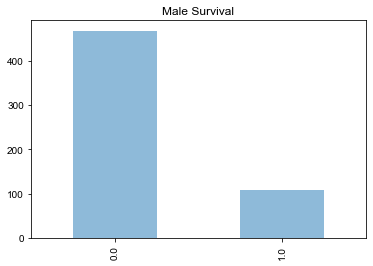

In [20]:
import seaborn as sns

titanic.Survived[titanic.Sex == 'male'].value_counts().plot(kind='bar', alpha=0.5)
plt.title("Male Survival")
# create style
sns.set_style("ticks")

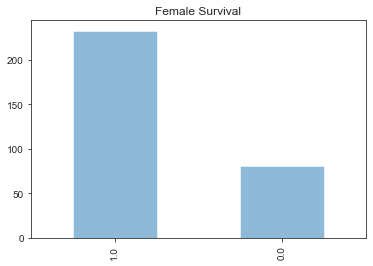

In [21]:
titanic.Survived[titanic.Sex == 'female'].value_counts().plot(kind='bar', alpha=0.5)
plt.title("Female Survival")
# create style
sns.set_style("ticks")

So having determined the unique classes within the 'Sex' column I can further identify the number of Males and Females who survived or not. By taking the 'Survived' column and sub-dividing it according to gender it displays how women were far more likely to have survived the Titanic disaster based on the predictor variables included with this dataset.

Next I want to group each category of male and female and store them in a variable called 'gender'.

In [22]:
gender = titanic.groupby(titanic['Sex'])

Checking the first few entries for both sexes:

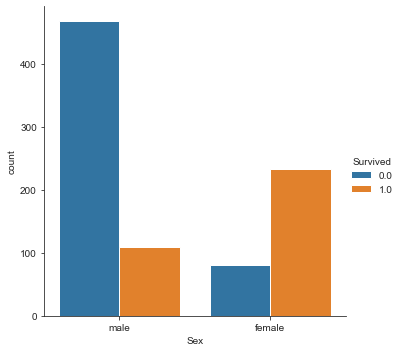

In [23]:
# Import Library
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = titanic)

Now there are two variables, one with all the male and one with all the female passengers in the Titanic dataset. There are a total of 843 male and 466 female passengers.

The next step is to add these totals together.

In [24]:
male_total = 843
female_total = 466
gender_total = male_total + female_total
gender_total

1309

Summing the total of all ages for all the passengers:

In [25]:
age = titanic['Age_wiki'].sum()
print(age)

38299.41


And dividing by the total number of passengers:

In [26]:
age_ave = age / gender_total
age_ave

29.25852559205501

So the overall average age for all passengers calculates to just over 29 years old. Using the describe method to check this gives:

In [27]:
titanic.describe()

,Survived,Pclass,SibSp,Parch,Age_wiki
count,891.000000,1309.000000,1309.000000,1309.000000,1302.000000
mean,0.383838,2.294882,0.498854,0.385027,29.415829
std,0.486592,0.837836,1.041658,0.865560,13.758954
min,0.000000,1.000000,0.000000,0.000000,0.170000
25%,0.000000,2.000000,0.000000,0.000000,21.000000
50%,0.000000,3.000000,0.000000,0.000000,28.000000
75%,1.000000,3.000000,1.000000,0.000000,37.750000
max,1.000000,3.000000,8.000000,9.000000,74.000000


So the first item to notice is that only numeric data appears to have been captured which will need to be fixed soon, but the answer I was looking for now, the mean age found under the 'Age-wiki' column is 29.415829 which is close to the value just calculated of 29.258525, but not identical.

Next, to see the average ages for both male and female classes:

In [28]:
titanic.groupby(by='Sex')['Age_wiki'].mean()

Sex
female    28.418467
male      29.966222
Name: Age_wiki, dtype: float64

So this produces the mean Age by Sex. What if I wanted to find an average age just for the missing values? I could create a sub-group of null values in the age column and apply the mean method.

In [29]:
titanic.groupby(titanic['Age_wiki'].isnull()).mean()

,Survived,Pclass,SibSp,Parch,Age_wiki
Age_wiki,,,,,
False,0.384442,2.294163,0.500768,0.384793,29.415829
True,0.250000,2.428571,0.142857,0.428571,NaN


In [30]:
male = gender.get_group('male')
male.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Age_wiki,Boarded
0,0.0,3,male,1,0,NaN,22.0,Southampton
4,0.0,3,male,0,0,NaN,35.0,Southampton
5,0.0,3,male,0,0,NaN,22.0,Queenstown
6,0.0,1,male,0,0,E46,54.0,Southampton
7,0.0,3,male,3,1,NaN,2.0,Southampton


In [31]:
female = gender.get_group('female')
female.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Age_wiki,Boarded
1,1.0,1,female,1,0,C85,35.0,Cherbourg
2,1.0,3,female,0,0,NaN,26.0,Southampton
3,1.0,1,female,1,0,C123,35.0,Southampton
8,1.0,3,female,0,2,NaN,26.0,Southampton
9,1.0,2,female,1,0,NaN,14.0,Cherbourg


I can see that all the variables are numeric except for the 'Boarded' column which is populated with categorical values. I will change these categorical values into numeric values using 'one-hot encoding'.

Viewing the total number of Male passengers who didn't survive (0.0), or did survive (1.0).

<AxesSubplot:>

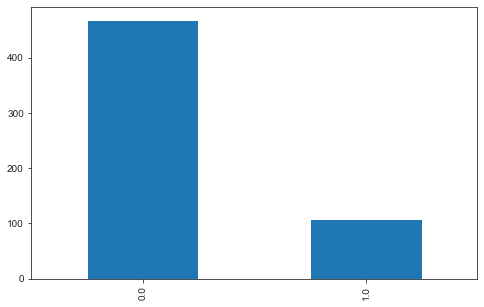

In [32]:
titanic.loc[titanic.Sex == 'male']['Survived'].value_counts().plot(kind='bar', figsize=(8,5))

The total number of Female passengers who didn't survive (0.0), or did survive (1.0).

<AxesSubplot:>

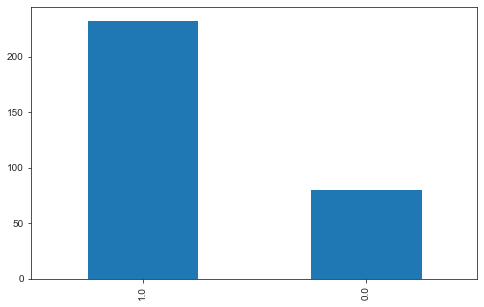

In [33]:
titanic.loc[titanic.Sex == 'female']['Survived'].value_counts().plot(kind='bar', figsize=(8,5))

In [34]:
gender_num = {'male': 0, 'female': 1}

titanic['Sex'] = titanic['Sex'].map(gender_num)
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Age_wiki,Boarded
0,0.0,3,0,1,0,NaN,22.0,Southampton
1,1.0,1,1,1,0,C85,35.0,Cherbourg
2,1.0,3,1,0,0,NaN,26.0,Southampton
3,1.0,1,1,1,0,C123,35.0,Southampton
4,0.0,3,0,0,0,NaN,35.0,Southampton


The next question is 'What do I do with these average ages?' Because there are only 7 values missing for 'Age' I believe imputing the missing values will be more beneficial than simply deleting the entries altogether. 

I will use the fillna() method to replace any Null values with imputed values for the average age for both men and women.

In [35]:
titanic['Age_wiki'].fillna()

ValueError: Must specify a fill 'value' or 'method'.

What about the string and categorical variables in the dataset? An important consideration to make when using visualizations would be the data types involved. For example, information can be split into numeric (quantitative) data and categorical (qualitative) data. Categorical data values could be Binomial (such as the target outcome 'Survived', or 'Sex'), Nominal (such as 'Cabin', or 'Boarded'), perhaps even Ordinal (such as 'Pclass'). 'Age_wiki' contains continuous values and the rest such as 'SibSp' (number of Siblings or Spouse) and 'Parch' (number of Children accompanied by Parents) would be discrete values.

When it comes to visualizing these different types of data it is generally better to use scatter and line plots for numeric data, but for categorical data, frequency distributions, bar charts and histograms may be a better approach for viewing different classes or sub-sets of values.

## Grouping Data Together
Taking a look at the average values for each feature based on their survival.

In [ ]:
titanic.groupby('Survived').mean()

In [ ]:
men = titanic.loc[titanic.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

In [ ]:
women = titanic.loc[titanic.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

## Predictor and Target Variables
Now I've established which features are to be included in the whole dataset, it's important to conduct a separation of the predictor variables contained in a dataframe and the target series. This will also lay a foundation for further splitting the labeled data into training and test sets later on.

In [ ]:
# removing the 'Survived' column from the predictors DataFrame variable X
X = titanic.drop(pd.Series(titanic['Survived'], axis=1, inplace=True)
# assigning this dropped column to the target Series variable y
y = pd.Series(titanic['Survived'])

In [ ]:
print(X.head)

In [ ]:
print(y.head)

## Nature of the Data
Of the remaining data 'Survived' is a float which needs to be changed to int. 

In [ ]:
titanic['Survived'] = titanic['Survived'].astype('int8', copy=True)

In [ ]:
titanic.describe()

## Visualizations

In [ ]:
fig = plt.figure(figsize=(18,6))
titanic.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.show()

Looking into relationships between the different columns can provide more insight, for example between 'Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Boarded' and their 'Survived' status.

In [ ]:
titanic.hist(bins=50, figsize(20,15))
plt.show()

The question is "How do I prepare the dataset with the correct number of total labeled entries?". I can either change the data at source and slice it using Excel, or alternatively slice the data in Python to only include the first 891 passengers. The reason this needs to be done is because of the risk of feeding inaccurate and unlabeled data back into the model. I believe using test data will introduce bias into the classification results. 